In [60]:
import pandas as pd
import numpy as np
import glob
from PIL import Image
import matplotlib.pyplot as plt
from tensorflow.keras.utils import image_dataset_from_directory
import tensorflow as tf

In [61]:
X1 = []
for filename in glob.glob('/Users/samiradarocha/code/Krastro/whereswally/raw_data/128/notwaldo/*.jpg'):
    im=Image.open(filename)
    X1.append(im)

In [62]:
len(X1)

1317

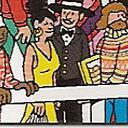

In [4]:
X1[0]

In [5]:
y1= np.zeros(len(X1))

In [6]:
X2 = []
for filename in glob.glob('/Users/samiradarocha/code/Krastro/whereswally/raw_data/128/waldo/*.jpg'):
    im=Image.open(filename)
    X2.append(im)

In [7]:
len(X2)

27

In [8]:
np.array(X2[0]).shape

(128, 128, 3)

In [9]:
y2= np.ones(len(X2))

In [10]:
X = np.concatenate((X1, X2), axis=0)
y = np.concatenate((y1, y2), axis=0)

<__array_function__ internals>:180: FutureWarning: The input object of type 'JpegImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'JpegImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
<__array_function__ internals>:180: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


Found 5376 files belonging to 2 classes.
<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
(32, 256, 256, 3)
(32,)


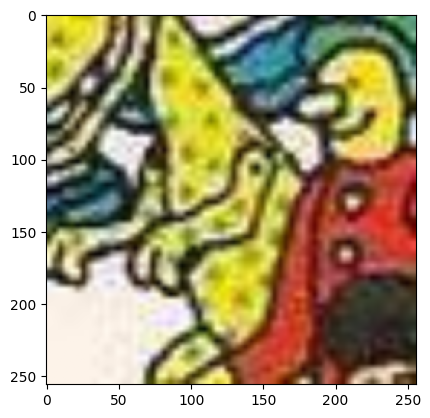

In [214]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

### data_dir is the directory where you stored your pictures
ds = tf.keras.preprocessing.image_dataset_from_directory('/Users/samiradarocha/code/Krastro/whereswally/raw_data/64/',
                                                         batch_size = 32)

# `ds` is a `tf.data.Dataset` object of "tuples"
print(ds)


# Understanding the batches
for (X_batch, y_batch)  in ds:
    print(X_batch.shape)
    print(y_batch.shape)
    
    break # just show the first batch

# check first image of the first batch
plt.imshow(X_batch[0]/255);

# Padding

In [208]:
def custom_padding(img):
    
    img = np.array(img)/255

    # COLOURED
    # =============
#     for i in img_array:
    if img.shape[-1] == 3:
        padded_img = np.zeros([256, 256, 3])

        ## Padding a "intermediate" image 128 x 128
        if img.shape == (128, 128, 3):
            padded_img[64:192, 64:192,:] = img
        ## Padding a "small" image 64 x 64
        if img.shape == (64,64, 3):
            padded_img[96:160, 96:160,:] = img

    # BLACK AND WHITE
    # =============
    if img.shape[-1] == 1:
        padded_img = np.zeros([256, 256, 1])

        ## Padding a "intermediate" image 128 x 128
        if img.shape == (128, 128, 1):
            padded_img[64:192, 64:192,:] = img
        ## Padding a "small" image 64 x 64
        if img.shape == (64,64, 1):
            padded_img[96:160, 96:160,:] = img
            
    return padded_img

In [209]:
def applying_padding(padded_img):
    X_s = []
    for x in range(len(padded_img)):
        temp = np.array(padded_img[x])
        X_s.append(custom_padding(temp))
    return X_s

In [227]:
a = applying_padding(X)

In [220]:
np.unique(a[30])

array([0.        , 0.00392157, 0.00784314, 0.01176471, 0.01568627,
       0.01960784, 0.02352941, 0.02745098, 0.03137255, 0.03529412,
       0.03921569, 0.04313725, 0.04705882, 0.05098039, 0.05490196,
       0.05882353, 0.0627451 , 0.06666667, 0.07058824, 0.0745098 ,
       0.07843137, 0.08235294, 0.08627451, 0.09019608, 0.09411765,
       0.09803922, 0.10196078, 0.10588235, 0.10980392, 0.11372549,
       0.11764706, 0.12156863, 0.1254902 , 0.12941176, 0.13333333,
       0.1372549 , 0.14117647, 0.14509804, 0.14901961, 0.15294118,
       0.15686275, 0.16078431, 0.16470588, 0.16862745, 0.17254902,
       0.17647059, 0.18039216, 0.18431373, 0.18823529, 0.19215686,
       0.19607843, 0.2       , 0.20392157, 0.20784314, 0.21176471,
       0.21568627, 0.21960784, 0.22352941, 0.22745098, 0.23137255,
       0.23529412, 0.23921569, 0.24313725, 0.24705882, 0.25098039,
       0.25490196, 0.25882353, 0.2627451 , 0.26666667, 0.27058824,
       0.2745098 , 0.27843137, 0.28235294, 0.28627451, 0.29019

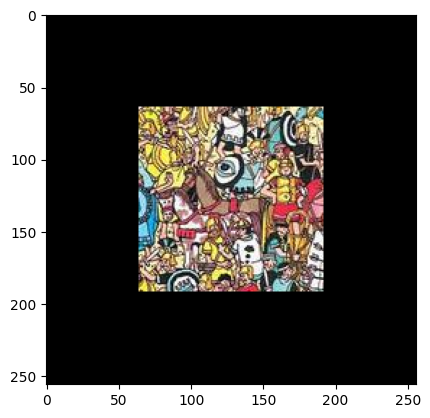

In [228]:
plt.imshow(a[30])

In [176]:
np.unique(a[31])

array([0.])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    featurewise_center = False,
    featurewise_std_normalization = False,
    rotation_range = 10,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    horizontal_flip = True,
    zoom_range = (0.8, 1.2),
    ) 

datagen.fit(y)
datagen

/Users/samiradarocha/.pyenv/versions/3.8.12/envs/whereswally/lib/python3.8/site-packages/keras/preprocessing/image.py:1869: FutureWarning: The input object of type 'JpegImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'JpegImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  x = np.asarray(x, dtype=self.dtype)


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (27,) + inhomogeneous part.

In [ ]:
y_aug = datagen.flow(y, shuffle=False, batch_size=1)

In [ ]:
import numpy as np

for i, (raw_image, augmented_image) in enumerate(zip(X_train, X_augmented_iterator)):
    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 2))
    ax1.imshow(raw_image)
    ax2.imshow(augmented_image[0])
    plt.show()
    
    if i > 10:
        break

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

In [ ]:
X_train_n = [np.array(X[x])/255 for x in range(len(X_train))]
X_test_n = [np.array(X[x])/255 for x in range(len(X_test))]

In [ ]:
from tensorflow.keras import layers, Sequential,metrics
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler

In [ ]:
def initialize_model():
    model = Sequential()

    model.add(layers.Conv2D(16, kernel_size=(3, 3), activation='relu',input_shape=X_train_n[0].shape))
    model.add(layers.MaxPool2D(pool_size=(2,2))) 

    model.add(layers.Conv2D(32, kernel_size=(2, 2), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    model.add(layers.Dropout(0.3))
    
    model.add(layers.Conv2D(128, kernel_size=(2, 2), activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2,2))) 
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())

    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(1, activation='sigmoid')) 

    return model

model = initialize_model()

In [ ]:
def compile_model(model,optz='adam'):
#     model.compile(loss='binary_crossentropy',optimizer=optz,metrics='accuracy')
    model.compile(loss='binary_crossentropy',optimizer=optz,metrics=['accuracy',metrics.Recall()])
    return model

In [19]:
model = initialize_model()
model = compile_model(model)
model.summary()

In [ ]:
model = initialize_model()
model = compile_model(model,'adam')
# callback = EarlyStopping(monitor='val_accuracy', patience=30,mode='max', restore_best_weights=True)
# callback2 = LearningRateScheduler(cosine_annealing)
# callback2 = LearningRateScheduler(scheduler) #Logaritmic scheduler
# callback2 = LearningRateScheduler(scheduler2) # normal and constant learning rate of 0.01
history = model.fit(np.array(X_train_n),
                    y_train,
                    validation_split=0.3,
                    batch_size=256,
                    epochs=5,verbose=1)#,
#                     callbacks=[callback,callback2])

In [ ]:
model.evaluate(np.array(X_test_n),y_test)

In [ ]:
from imblearn.over_sampling import SMOTE 

In [ ]:
X2 = np.array([np.array(X[x])/255 for x in range(len(X))])

In [ ]:
ReX  = X2.reshape(X2.shape[0],128*128*3)
smt = SMOTE()
Xsm, ysm = smt.fit_resample(ReX, y)

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(Xsm, ysm, test_size=0.3, random_state=2)

In [ ]:
model = initialize_model()
model = compile_model(model,'adam')
history = model.fit(X_train2,
                    y_train2,
                    validation_split=0.3,
                    batch_size=128,
                    epochs=20,verbose=1)#,

In [ ]:
X_test2 = X_test2.reshape(len(y_test2),128,128,3)

In [ ]:
model.evaluate(X_test2,y_test2)

In [ ]:
predict_input = []
for filename in glob.glob('/Users/laura/Downloads/2_Waldo_Illustration.png'):
    pr=Image.open(filename)
    predict_input.append(pr)

In [ ]:
predict_input[0]

In [ ]:
temp = np.array(predict_input[0])

In [ ]:
M = 128
N = 128
tiles = [temp[x:x+M,y:y+N] for x in range(0,temp.shape[0],M) for y in range(0,temp.shape[1],N)]

In [ ]:
X_predict = np.array([np.array(tiles[x])/255 for x in range(len(tiles))])

In [ ]:
temp = model.predict(X_predict)

In [ ]:
temp2 = pd.DataFrame(temp)>=0.4
temp2[temp2[0]==True]

In [ ]:
fig , axes = plt.subplots(1,2,figsize=(30,10))
axes[0].imshow(tiles[42])
axes[1].imshow(tiles[44])
# axes[2].imshow(tiles[38])

In [ ]:
predict_input = []
for filename in glob.glob('/Users/laura/Downloads/original.jpg'):
    pr=Image.open(filename)
    predict_input.append(pr)
predict_input[0]

In [ ]:
temp_resized = predict_input[0].resize((896, 1152))
temp_resized

In [ ]:
temp = np.array(temp_resized)
M = 128
N = 128
tiles = [temp[x:x+M,y:y+N] for x in range(0,temp.shape[0],M) for y in range(0,temp.shape[1],N)]
# print(len(tiles))
# plt.imshow(tiles[9])
X_predict = np.array([np.array(tiles[x])/255 for x in range(len(tiles))])

In [ ]:
temp = model.predict(X_predict)

In [ ]:
temp2 = pd.DataFrame(temp)>=0.8
temp2[temp2[0]==True]

In [ ]:
fig , axes = plt.subplots(1,4,figsize=(30,10))
axes[0].imshow(tiles[47])
axes[1].imshow(tiles[53])
axes[2].imshow(tiles[45])
axes[3].imshow(tiles[54])

In [ ]:
temp2 = pd.DataFrame(temp)>=0.3
temp2[temp2[0]==True]